## Load library

In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scripts, sklearn.decomposition, plot, sklearn.cluster
import matplotlib.pyplot as plt
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Data

In [37]:
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfr.iloc[:10]

In [28]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,6.683879,3.443073,6.699971,6.778422,2.629335,0.952357,3.187266,6.769028,2.644708,6.666025,...,2.958371,2.167224,3.297691,3.013177,3.122202,8.259955,1.273316,2.495036,0.485210,3.349773
sample 2,3.375309,6.692176,6.751482,6.725042,2.460008,7.657983,3.210743,7.716293,6.685865,2.499209,...,3.448257,2.671082,0.844988,2.478623,3.319687,2.364278,8.252168,0.552921,2.022340,1.609176
sample 3,6.742676,6.666867,2.877933,2.277373,6.781820,7.704915,6.719113,6.701374,8.243211,7.653346,...,2.837284,3.427974,1.379425,2.619741,0.667034,2.885641,0.569457,2.966915,3.074307,7.661829
sample 4,3.125646,0.098988,2.316167,6.787116,6.757233,6.675235,3.336684,3.292080,2.467517,1.325030,...,1.288589,2.068281,1.364336,3.406296,7.670211,6.787299,2.204076,2.912365,2.612284,2.779267
sample 5,6.786586,6.792126,6.733167,2.952650,6.746154,6.786714,7.708360,6.758367,1.315620,1.316055,...,2.500291,2.787452,0.557702,1.003202,3.437699,3.161848,2.723348,3.079249,3.000871,1.566821


In [29]:
dfr.head()

,PC1,cell cluster
sample 1,10.533253,1
sample 2,12.047276,1
sample 3,11.010120,16
sample 4,8.302622,9
sample 5,9.227625,15


In [30]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,0.215691,1,-0.036722
gene 2,0.204115,3,-0.045090
gene 3,0.196843,1,-0.021521
gene 4,0.195241,3,-0.017529
gene 5,0.169692,3,-0.023457


## Make some plots

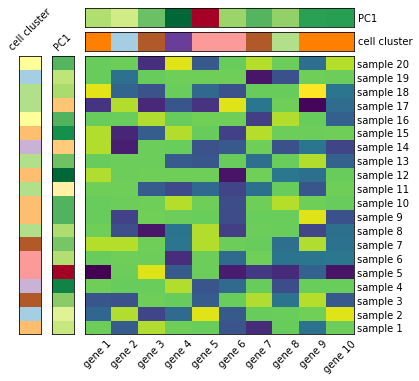

In [40]:
g = plot.nheatmap(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps,
                 show_cbar=False)
fig, plots = g.run()

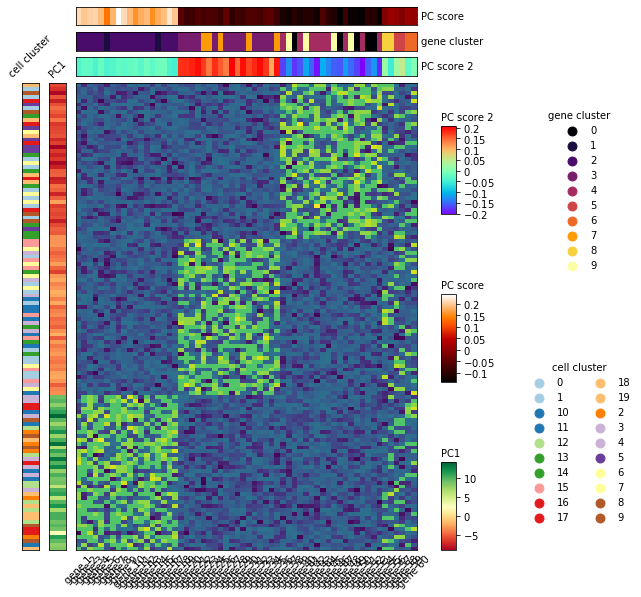

In [41]:
g = plot.nheatmap(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

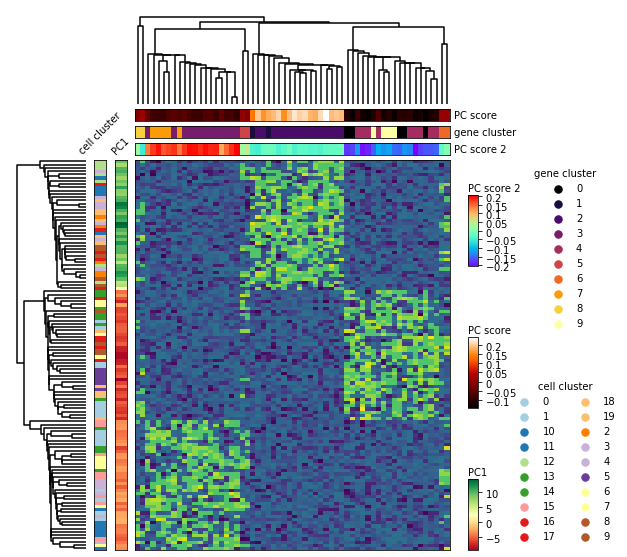

In [42]:
g = plot.nheatmap(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster()
fig, plots = g.run()